In [2]:
# Set up paths/ os
import os
import sys

this_path=os.getcwd()
os.chdir("../data")
sys.path.insert(0, this_path)


In [3]:
import pandas as pd


In [4]:
import numpy as np

def cohen_d(X1,X2):
    std1=X1.std()
    mean1=X1.mean()
    N1=len(X1)
    std2=X2.std()
    mean2=X2.mean()
    N2=len(X2)
    #pooled std
    s2=(float(N1-1)*std1 + float(N2-1)*std2)/float(N1+N2-2)
    s=np.sqrt(s2)
    cohend=abs(mean2-mean1)/s
    return(cohend)

In [5]:
# Get 5% percentile:

def get_fifth_p(X):
    N = len(X)
    Xsorted = np.sort(X)
    fifth = int(N*0.05)-1
    fifth_p  = Xsorted[fifth]
    return fifth_p
        
def get_fraction_under_value(X,value):
    N = len(X)
    Xsorted = np.sort(X)
    for ii in range(N):
        v2 = Xsorted[ii]
        if value <= v2:
            fraction = float((ii+1)/N)*100
            return fraction
    return fraction
            

In [6]:
infile="MedHelp-posts.csv"
df=pd.read_csv(infile,index_col=0)
df.head(1)

,title,text,href,user id,mother post id
post id,,,,,
1,Inappropriate Masterbation Down Syndrome,\n It is common for children and adoles...,http://www.medhelp.org//posts/Autism--Asperger...,user_340688,1


In [7]:
infile="MedHelp-users-class.csv"
df_users=pd.read_csv(infile,index_col=0)
df_users.head(1)

,user description,is expert
user id,,
user_340688,"Rachel Thompson, Ph.D., BCBA",1


In [8]:
from textstat.textstat import textstat
def get_grade(a,b,text):
    ASL=textstat.avg_sentence_length(text)
    ASW=textstat.avg_syllables_per_word(text)
    #FKRA = float(0.39 * ASL) + float(11.8 * ASW) - 15.59
    #grade=round(FKRA, 1)
    grade = float(a*ASL) + float(b*ASW)
    return grade



In [9]:
#def coleman_liau_index(n_chars, n_words, n_sents):
#    """https://en.wikipedia.org/wiki/Coleman%E2%80%93Liau_index"""
#    return (5.879851 * n_chars / n_words) - (29.587280 * n_sents / n_words) - 15.800804
def mod_cli(a,b,text):
    L = round(textstat.avg_letter_per_word(text)*100, 2)
    S = round(textstat.avg_sentence_per_word(text)*100, 2)
    #CLI = float((0.058 * L) - (0.296 * S) - 15.8)
    CLI = float(a*L) - (b*S)
    return round(CLI, 2)


In [10]:
text="Whether or not your son has Chiari malformation is a question for your medical doctor.  If you have concerns, absolutely take them to your doctor and make sure they are addressed."
grade=get_grade(1,1,text)
print(grade)

17.0


In [11]:
# Calculate all smog scores for texts from professional and non-professional
expert_uids=df_users.loc[df_users['is expert']==1].index
non_expert_uids=df_users.loc[df_users['is expert']==0].index


In [12]:
print(len(df))
df_experts=df.loc[df['user id'].isin(expert_uids)]
print(len(df_experts))

df_non_experts=df.loc[df['user id'].isin(non_expert_uids)]
print(len(df_non_experts))

1813
727
1086


In [13]:
text_experts=df_experts['text']
text_non_experts=df_non_experts['text']

In [14]:
#readability_experts=text_experts.apply(textstat.smog_index)
#readability_non_experts=text_non_experts.apply(textstat.smog_index)

readability_experts=text_experts.apply(textstat.flesch_kincaid_grade)
readability_non_experts=text_non_experts.apply(textstat.flesch_kincaid_grade)

In [15]:
print(cohen_d(readability_experts.values,readability_non_experts.values))


1.95321065231


In [14]:
X = np.arange(100,0,-1)
print(get_fifth_p(X))
print(get_fraction_under_value(X,5))

In [26]:
fifth_p = get_fifth_p(readability_experts.values)
print(fifth_p)
print(get_fraction_under_value(readability_non_experts.values,fifth_p))
    

7.6
60.31307550644567


In [28]:
# Smog:

X1=text_experts.apply(textstat.smog_index).values
X2=text_non_experts.apply(textstat.smog_index).values
fifth_p = get_fifth_p(X1)
print(fifth_p)
print(get_fraction_under_value(X2,fifth_p))

0.0
0.09208103130755065


In [31]:
# Smog + Flesch Kincaid grade
X1 = text_experts.apply(textstat.smog_index).values
X1 = X1 + text_experts.apply(textstat.flesch_kincaid_grade).values
X2 = text_non_experts.apply(textstat.smog_index).values
X2 = X2 + text_non_experts.apply(textstat.flesch_kincaid_grade).values

fifth_p = get_fifth_p(X1)
print(fifth_p)
print(get_fraction_under_value(X2,fifth_p))

12.6
48.98710865561694


In [32]:
# Coleman liau

X1=text_experts.apply(textstat.coleman_liau_index).values
X2=text_non_experts.apply(textstat.coleman_liau_index).values
fifth_p = get_fifth_p(X1)
print(fifth_p)
print(get_fraction_under_value(X2,fifth_p))

9.0
55.52486187845304


In [13]:
# Coleman Liau + Flesch Kincaid grade
#automated_readability_index
def readability_cli(X):
    return X.apply(textstat.coleman_liau_index).values 
def readability_fcg(X):
    return X.apply(textstat.flesch_kincaid_grade).values 

In [14]:
# Colmena Liau + Flesch Kincaid grade
X1a = readability_cli(text_experts)
X1b = readability_fcg(text_experts)

X2a = readability_cli(text_non_experts)
X2b = readability_fcg(text_non_experts)

for a in range(10):
    X1 = X1a + a*X1b
    X2 = X2a + a*X2b 
    fifth_p = get_fifth_p(X1)
    print(a,fifth_p,get_fraction_under_value(X2,fifth_p))

0 9.0 55.52486187845304
1 17.19 63.07550644567219
2 24.91 63.25966850828729
3 32.85 63.996316758747696
4 40.52 63.53591160220995
5 48.15 63.44383057090239
6 56.05 63.996316758747696
7 63.41 63.07550644567219
8 71.11 63.07550644567219
9 78.81 62.89134438305709


In [16]:
#automated_readability_index
def readability_ari(X):
    return X.apply(textstat.automated_readability_index).values 

X1=readability_ari(text_experts)
X2=readability_ari(text_non_experts)
fifth_p = get_fifth_p(X1)
print(fifth_p)
print(get_fraction_under_value(X2,fifth_p))


9.2
60.49723756906077


In [19]:
# Colmena Liau + Flesch Kincaid grade + automated readability index
X1a = readability_cli(text_experts)
X1b = readability_fcg(text_experts)
X1c = readability_ari(text_experts)

X2a = readability_cli(text_non_experts)
X2b = readability_fcg(text_non_experts)
X2c = readability_ari(text_non_experts)

X1ab = X1a + 6*X1b
X2ab = X2a + 6*X2b

for a in range(10):
    X1 = X1ab + a*X1c
    X2 = X2ab + a*X2c
    fifth_p = get_fifth_p(X1)
    print(a,fifth_p,get_fraction_under_value(X2,fifth_p))

0 56.05 63.996316758747696
1 65.12 63.07550644567219
2 74.85 63.35174953959485
3 83.65 62.79926335174954
4 92.51 62.246777163904234
5 102.28 62.79926335174954
6 111.7 62.70718232044199
7 120.8 62.523020257826886
8 129.9 62.430939226519335
9 139.0 62.246777163904234


In [23]:
def readability_dcr(X):
    return X.apply(textstat.dale_chall_readability_score).values
X1_dcr=readability_dcr(text_experts)
X2_dcr=readability_dcr(text_non_experts)
fifth_p = get_fifth_p(X1_dcr)
print(fifth_p)
print(get_fraction_under_value(X2_dcr,fifth_p))

8.34
47.790055248618785


In [24]:
def readability_dw(X):
    return X.apply(textstat.difficult_words).values

X1_dw=readability_dw(text_experts)
X2_dw=readability_dw(text_non_experts)
fifth_p = get_fifth_p(X1_dw)
print(fifth_p)
print(get_fraction_under_value(X2_dw,fifth_p))

15
30.11049723756906


In [25]:
# Colmena Liau + Flesch Kincaid grade + automated readability index

#X1a = readability_cli(text_experts)
#X1b = readability_fcg(text_experts)
#X2a = readability_cli(text_non_experts)
#X2b = readability_fcg(text_non_experts)
#X1ab = X1a + 6*X1b
#X2ab = X2a + 6*X2b

for a in range(2):
    X1 = X1ab + a*X1_dcr
    X2 = X2ab + a*X2_dcr
    fifth_p = get_fifth_p(X1)
    print(a,fifth_p,get_fraction_under_value(X2,fifth_p))

0 56.05 63.996316758747696
1 64.72 63.35174953959485


In [28]:
# add dw
for a in range(5):
    X1 = X1ab + a*X1_dw
    X2 = X2ab + a*X2_dw
    fifth_p = get_fifth_p(X1)
    print(a,fifth_p,get_fraction_under_value(X2,fifth_p))

0 56.05 63.996316758747696
1 78.78 45.11970534069982
2 95.16 40.79189686924494
3 111.82 37.93738489871086
4 129.41 36.92449355432781


In [29]:
def readability_lwf(X):
    return X.apply(textstat.linsear_write_formula).values

X1_lwf=readability_lwf(text_experts)
X2_lwf=readability_lwf(text_non_experts)
fifth_p = get_fifth_p(X1_lwf)
print(fifth_p)
print(get_fraction_under_value(X2_lwf,fifth_p))


6.625
43.370165745856355


In [30]:
# add lwf
for a in range(5):
    X1 = X1ab + a*X1_lwf
    X2 = X2ab + a*X2_lwf
    fifth_p = get_fifth_p(X1)
    print(a,fifth_p,get_fraction_under_value(X2,fifth_p))

0 56.05 63.996316758747696
1 63.67 61.69429097605893
2 71.8257142857 61.32596685082873
3 78.625 58.93186003683242
4 85.75 58.5635359116022


In [31]:
def readability_gf(X):
    return X.apply(textstat.gunning_fog).values

X1_gf=readability_gf(text_experts)
X2_gf=readability_gf(text_non_experts)
fifth_p = get_fifth_p(X1_gf)
print(fifth_p)
print(get_fraction_under_value(X2_gf,fifth_p))

19.1494505495
55.70902394106814


In [33]:
# add gf
for a in range(5):
    X1 = X1ab + a*X1_gf
    X2 = X2ab + a*X2_gf
    fifth_p = get_fifth_p(X1)
    print(a,fifth_p,get_fraction_under_value(X2,fifth_p))

0 56.05 63.996316758747696
1 75.3992307692 62.70718232044199
2 95.0661403509 62.523020257826886
3 113.707567568 61.233885819521184
4 132.882280702 60.86556169429097


In [53]:
# vary a and b in Readability formula:
# score = (a * ASL) + (b * ASW)

step_b=5
step_a=0.05

results=[]
#for aa in range(1,40,1):
for aa in range(1,20,1):

    a=aa*step_a
    #for bb in range(1,40,1):
    for bb in range(1,20,1):

        b=bb*step_b
        r1 = text_experts.apply(lambda x: get_grade(a,b,x)).values
        r2 = text_non_experts.apply(lambda x: get_grade(a,b,x)).values
        fifth_p = get_fifth_p(r1)
        fraction = get_fraction_under_value(r2,fifth_p)
        #d = cohen_d(r1,r2)
        results.append(dict(a=a,b=b,fraction = fraction))
        #print(a,b,d)

In [54]:
import pickle

file_pi = open('readability_test.pi', 'wb')
pickle.dump(results, file_pi)
file_pi.close()
#del results


#file_pi = open('readability_test.pi', 'rb') 
#results = pickle.load(file_pi)
#print(results)

In [55]:
df = pd.DataFrame.from_dict(results)

df.head(2)

,a,b,fraction
0,0.1,10,59.392265
1,0.1,20,56.906077


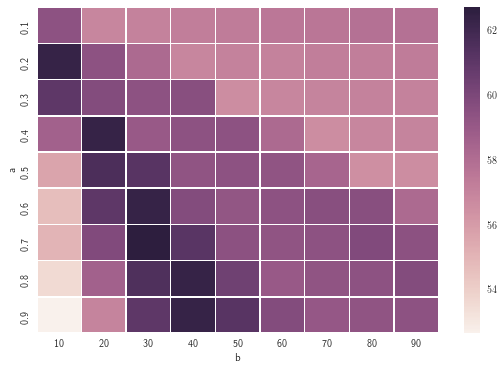

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

#data = df.pivot("a", "b", "d")
#ax = sns.heatmap(df, cmap="YlGnBu")



import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
data = df.pivot("a", "b", "fraction")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(data,  linewidths=.5, ax=ax)

plt.show()


In [42]:
# Now try to get more on the Coleman-Liau Index
a=7
b=30.0

# vary a and b in Readability formula:
# score = (a * ASL) + (b * ASW)

step_c=1
step_d=5

del results
results=[]
for cc in range(1,10,1):
    c=cc*step_c
    for dd in range(1,10,1):

        d=dd*step_d
        #
        r1 = text_experts.apply(lambda x: mod_cli(c,d,x)).values
        #
        r2 = text_non_experts.apply(lambda x: mod_cli(c,d,x)).values
        
        fifth_p = get_fifth_p(r1)
        fraction = get_fraction_under_value(r2,fifth_p)
        #d = cohen_d(r1,r2)
        results.append(dict(c=c,d=d,fraction = fraction))
        print(c,d,fraction)


1 5 54.69613259668509
1 10 62.338858195211785
1 15 64.82504604051566
1 20 66.66666666666666
1 25 64.9171270718232
1 30 65.56169429097606
1 35 64.1804788213628
1 40 61.418047882136285
1 45 58.83977900552486
2 5 52.67034990791897
2 10 54.69613259668509
2 15 59.30018416206262
2 20 62.338858195211785
2 25 64.08839779005525
2 30 64.82504604051566
2 35 65.83793738489871
2 40 66.66666666666666
2 45 65.74585635359117
3 5 50.552486187845304
3 10 53.95948434622467
3 15 54.69613259668509
3 20 58.74769797421732
3 25 60.036832412523026
3 30 62.338858195211785
3 35 63.07550644567219
3 40 64.27255985267035
3 45 64.82504604051566
4 5 50.82872928176796
4 10 52.67034990791897
4 15 54.32780847145487
4 20 54.69613259668509
4 25 58.011049723756905
4 30 59.30018416206262
4 35 60.40515653775322
4 40 62.338858195211785
4 45 62.338858195211785
5 5 49.72375690607735
5 10 50.64456721915286
5 15 53.40699815837937
5 20 54.41988950276243
5 25 54.69613259668509
5 30 57.36648250460406
5 35 58.3793738489871
5 40 59.85

In [46]:
df = pd.DataFrame.from_dict(results)


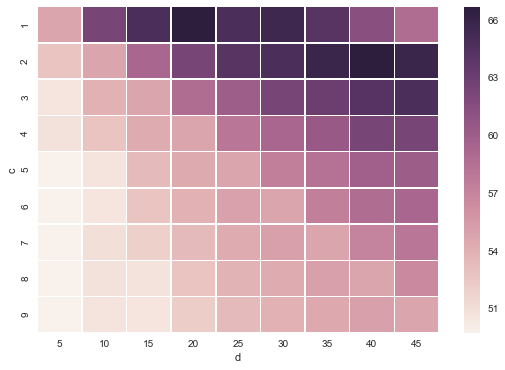

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Load the example flights dataset and conver to long-form
data = df.pivot("c", "d", "fraction")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(data,  linewidths=.5, ax=ax)

plt.show()

In [45]:
df_sorted=df.sort_values(['fraction'], ascending=[False])
df_sorted.head()

,c,d,fraction
3,1,20,66.666667
16,2,40,66.666667
15,2,35,65.837937
17,2,45,65.745856
5,1,30,65.561694


In [49]:
# Mix them:

a=0.7
b=30.0
c=1
d=20


for fact in range(3,10):
    r1 = text_experts.apply(lambda x: fact * mod_cli(c,d,x) + get_grade(a,b,x) ).values
    r2 = text_non_experts.apply(lambda x: fact * mod_cli(c,d,x) + get_grade(a,b,x)).values

    fifth_p = get_fifth_p(r1)
    fraction = get_fraction_under_value(r2,fifth_p)
    print(fact,fifth_p,fraction)


3 1103.0 67.12707182320442
4 1452.41 67.21915285451196
5 1801.41 67.12707182320442
6 2150.41 67.21915285451196
7 2499.41 67.03499079189686
8 2848.41 67.03499079189686
9 3197.41 67.03499079189686


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
from matplotlib import gridspec
from scipy.stats import norm
from scipy.optimize import curve_fit
from lognormal import lognormal, lognormal_stats
import numpy as np


In [62]:
r1 = text_experts.apply(lambda x: mod_cli(1,20,x))
r2 = text_non_experts.apply(lambda x: mod_cli(1,20,x))

fifth_p = get_fifth_p(r1)
fraction = get_fraction_under_value(r2,fifth_p)
print('fifth',fifth_p,' fraction',fraction)

xmax =int(r1.values.max())
xmin = int(r2.values.min())
xmin = 100
xmax = 600
print(type(r1.values),type(r2.values))
print(len(r1),len(r2))
print(r1.values.mean())
print(r2.values.mean())
print(r1.values.std())
print(r2.values.std())


fifth 349.0  fraction 66.66666666666666
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
727 1086
422.240715268
317.267955801
48.357689437
131.246787297


In [59]:
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True

plt.rcParams.update({'font.size': 24})
label_size = 18
plt.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['ytick.labelsize'] = label_size 
plt.rcParams['axes.linewidth'] = 5 # set the value globally
plt.rc('axes', linewidth=2)

fig = plt.figure()
#fig=plt.figure(figsize=(2,1))
#fig.set_size_inches(6.6,3.3)
gs = gridspec.GridSpec(2, 1)
#fig, ax = plt.subplots(ncols=1, nrows=1) # These arguments can be omitted for one


plt.subplots_adjust(left=0.2,right=1.0,bottom=0.17,top=0.9)
fig.set_size_inches(6,6)



#plt.suptitle('Readability score')
fig.text(0.04,0.5,'Distribution',va='center',rotation='vertical')
fig.text(0.4,0.04,'Readability score',va='center')

Experts: Mean,variance: (422.2407152682256,2338.466127686466)
Non experts: Mean,variance: 317.267955801 17225.7191757


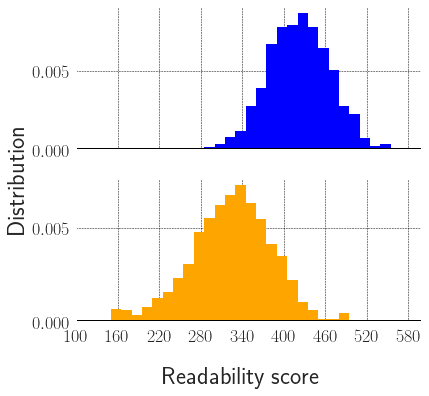

In [60]:
#X ticks

#plt.ylabel('Distribution')

#xmax=1000
xsteps=int(xmax/10)
xsteps_bins=int(xsteps/4)
x=np.arange(xmin,xmax,xsteps) #xtics
xx=np.arange(xmin,xmax,xsteps)

# Panel 1
ax1=plt.subplot(gs[0],facecolor='w')
ax1.set_xlim([xmin, xmax])
ax1.set_xticks(x)
#ax1.set_ylim([0, 0.2])
#ax1.set_yticks(np.arange(0,0.3,0.1))

ax1.tick_params(labelbottom='off')  
# Customize the grid
ax1.grid(linestyle='--', linewidth='0.5', color='black',which='both')
ax1.axhline(linewidth=4, color="black")        # inc. width of x-axis and color it green
ax1.axvline(linewidth=4, color="black")

#Class 0

X=r1.values

#n,bins,patches=plt.hist(X,nbins,normed=1,facecolor='blue',align='mid',label='Experts')
n,bins,patches=plt.hist(X, bins=np.arange(0, xmax, xsteps_bins),normed=1,facecolor='blue',align='mid',label='Experts')

mu=X.mean()
var=X.var()
#legend1=plt.legend(bbox_to_anchor=(0.45, 0.95), loc=0, borderaxespad=0., fontsize=label_size)


print("Experts: Mean,variance: ({},{})".format(mu,var))


# Panel 2
ax2=plt.subplot(gs[1],facecolor='w')
ax2.set_xlim([xmin, xmax])
ax2.set_xticks(x)
#ax2.set_ylim([0, 0.2])
#ax2.set_yticks(np.arange(0,0.3,0.1))
ax2.grid(linestyle='--', linewidth='0.5', color='black',which='both')
ax2.axhline(linewidth=4, color="black")        # inc. width of x-axis and color it green
ax2.axvline(linewidth=4, color="black")


#Class 1
X=r2.values

        
#n,bins,patches=plt.hist(X,nbins,normed=1,facecolor='orange',align='mid',label='Non experts')
n,bins,patches=plt.hist(X, bins=np.arange(0, xmax, xsteps_bins),normed=1,facecolor='orange',align='mid',label='Non experts')


mu=X.mean()
var=X.var()

#legend2=plt.legend(bbox_to_anchor=(0.45, 0.95), loc=0, borderaxespad=0., fontsize=label_size,frameon=1)


print("Non experts: Mean,variance:",mu,var)


plt.show()

In [61]:
#fig.facecolor="white"
fig.savefig('Readability-v2.jpeg', dpi=300)